# Assignment 1

This assignment is due on __Sunday 22 January__, by midnight. It pertains to content taught in classes 1-3, i.e., week 1. 

This assignment should be completed in Python, and an PDF file should be submitted, containing both code and written answers. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

Please do not be intimidated by the apparent length of this assignment (it is deceiving!). All required code is a single line. Questions that require identification and/or intepretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in class. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to tutorial. We will work with you through the issue.

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

Any questions can be addressed to Kamilah ([kamilah.ebrahim@mail.utoronto.ca]()) and/or Ananya ([ananya.jha@mail.utoronto.ca]()) and/or Vishnou ([vishnouvina@cs.toronto.edu]()) before the due-date. Please sumbit your assistments through this [link](https://forms.gle/5ocshXh5ZtUj8WXY6).

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [7]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [8]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html)):

-   Median value of owner-occupied homes in $1000s.
-   Weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?
-    The liniar regresion between the median of owners and distances to five Boston employment centres.

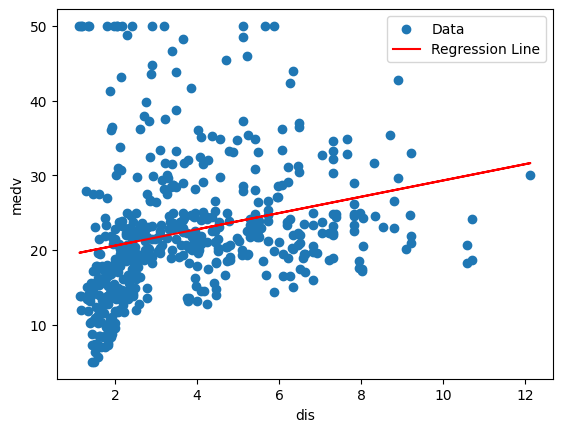

In [9]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [10]:
X = Boston['dis']
y = Boston['medv'] #response variable

X = sm.add_constant(X) #add a constant term to the predictors(intercept)

#fit the OLS model
model = sm.OLS(y,X)
results = model.fit()

#print the regresion mresults summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        22:04:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)? 
-   The coefficient estimates are 1.0916  for iterceptand and 18.3901 fir slope

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
-    Standard Errors are  0.188 for dis and 0.817 for const.

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
-   The confdence intervals are [0.025      0.975]

Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
-   the R-squared is 6.2%, which is very low variance explained.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  
-   p is 0, therefore we should reject the null hypothesis

In [11]:
#summary conf_int

y = Boston['medv']
model = sm.OLS(y, X) # to specify the model
results = model.fit()
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
               0          1
const  16.784179  19.995997
dis     0.721509   1.461717


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [12]:
X = Boston[['dis','rm']]
y = Boston['medv'] #response variable

X = sm.add_constant(X) #add a constant term to the predictors(intercept)

#fit the OLS model
model = sm.OLS(y,X)
results = model.fit()

#print the regresion mresults summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.84e-75
Time:                        22:05:00   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt function `graphics.plot_regress_exog`to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

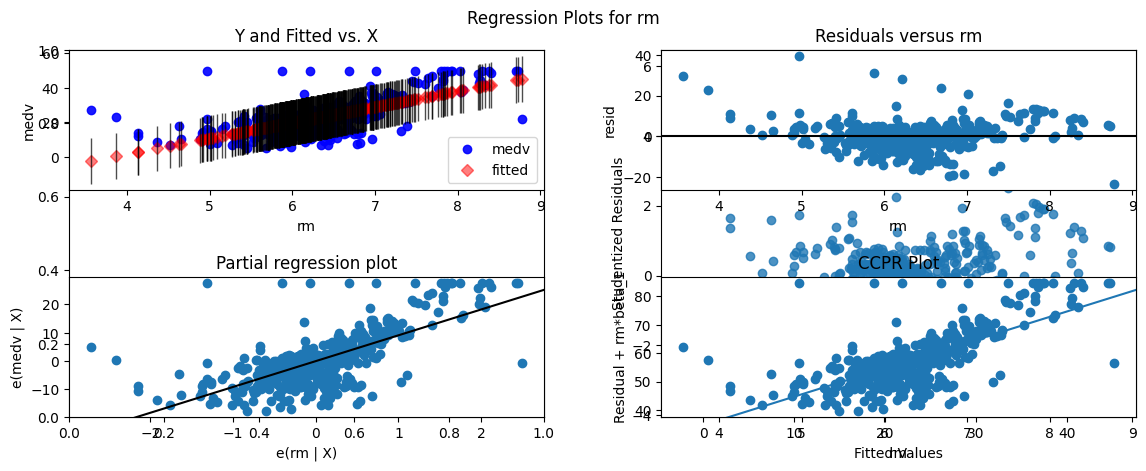

In [13]:
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(result, 'rm', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(result.fittedvalues, result.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

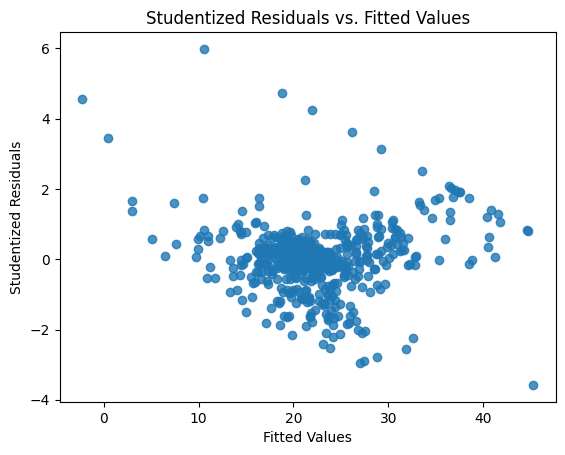

In [14]:
# Fit a linear regression model
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Get the predicted values and studentized residuals
predicted_values = result.predict()
studentized_residuals = result.get_influence().resid_studentized_internal

# Plot the Studentized Residuals vs. Fitted Values
plt.scatter(predicted_values, studentized_residuals, alpha=0.8)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

### Question 3: Classification using KNN

We'll now use the `Caravan` dataset from the `ISLP` package. (You may use `Caravan.describe()` to review details of the dataset.) In this dataset, the response variable of interest is `Purchase`, which indicates if a given customer purchased a caravan insurance policy. We will simultaneously use all other variables in the dataset to predict the response variable.

In [15]:
# Load the "Caravan" dataset using the "load_data" function from the ISLP package
Caravan = load_data('Caravan')


Before fitting any model, it is essential to understand our data. Answer the following questions about the `Caravan` dataset (Hint: use `print` and `describe`):  
_(i)_ How many observations (rows) does the dataset contain?    
-   8 rows

_(ii)_ How many variables (columns) does the dataset contain?   
-   85 columns 

_(iii)_ What 'variable' type is the response variable `Purchase` (e.g., 'character', 'factor', 'numeric', etc)? What are the 'levels' of the variable?   
-   numeric

_(iv)_ How many predictor variables do we have (Hint: all variables other than `Purchase`)?  
-   85

In [16]:
Caravan.describe()
# Add your code here

MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF     MOSHOOFD  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

            MGODRK       MGODPR       MGODOV       MGODGE       MRELGE  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069907     3.258502     6.183442  ...   
std       1.003234     1.715843     1.017503     1.597647     1.909482  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     4.000000     0.000000     2.000000     5.000000  ...   
50%       0.000000     5.000000     1.000000     3.000000     6.000000  ...   
75%       1.000000     6.000000     2.000000     4.000000     7.000000  ...   
max       9.000000     9.000000     5.000000     9.000000     9.000000  ...   

            ALEVEN     APERSONG      AGEZONG      AWAOREG       ABRAND  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      0.076606     0.005325     0.006527     0.004638     0.570079   
std       0.377569     0.072782     0.080532     0.077403     0.562058   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     0.000000     0.000000     1.000000   
max       8.000000     1.000000     1.000000     2.000000     7.000000   

           AZEILPL     APLEZIER       AFIETS      AINBOED     ABYSTAND  
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  
mean      0.000515     0.006012     0.031776     0.007901     0.014256  
std       0.022696     0.081632     0.210986     0.090463     0.119996  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     2.000000     3.000000     2.000000     2.000000  

[8 rows x 85 columns]

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the `scaler` method, provided as follows:

In [17]:
# Select predictors (excluding the 86th column)
predictors = Caravan.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    MOSTYPE  MAANTHUI   MGEMOMV  MGEMLEEF  MOSHOOFD    MGODRK    MGODPR  \
0  0.680906  -0.27258  0.406697 -1.216964  0.779405 -0.694311  0.217444   
1  0.992297  -0.27258 -0.859500 -1.216964  0.779405  0.302552 -0.365410   
2  0.992297  -0.27258 -0.859500 -1.216964  0.779405 -0.694311 -0.365410   
3 -1.187437  -0.27258  0.406697  0.010755 -0.970980  1.299414 -0.948264   
4  1.225840  -0.27258  1.672893 -1.216964  1.479559  0.302552 -0.365410   

     MGODOV    MGODGE    MRELGE  ...   ALEVEN  APERSONG   AGEZONG  AWAOREG  \
0 -0.068711 -0.161816  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   
1 -0.068711  0.464159 -0.096077  ... -0.20291 -0.073165 -0.081055 -0.05992   
2  0.914172  0.464159 -1.667319  ... -0.20291 -0.073165 -0.081055 -0.05992   
3  0.914172  0.464159 -0.619824  ... -0.20291 -0.073165 -0.081055 -0.05992   
4 -0.068711  0.464159  0.427670  ... -0.20291 -0.073165 -0.081055 -0.05992   

     ABRAND   AZEILPL  APLEZIER   AFIETS   AINBOED  ABYSTAND  
0  0.764971 -0.02

_(v)_ Why is it important to standardize the predictor variables?  
_(vi)_ Why did we elect not to standard our response variable `Purchase`?  
-   standardize the independent variables when your model contains polynomial terms to model curvature or interaction terms. These terms provide crucial information about the relationships between the independent variables and the dependent variable,


_(vii)_ A second essential step is to set a random seed. Do so below (Hint: use the `random.seed` function). Why is setting a seed important? Is the particular seed value important? Why or why not?
-   The goal is to make sure we get the same training and validation data set while we use different hyperparameters or machine learning algorithms in order to assess the performance of different models.

In [18]:
import random

random.seed(85)
print(random.random()) 


0.1995887063541001


_(viii)_ A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. Extend the code to create a non-overlapping test set for the predictors and response variables.

In [19]:
# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = Caravan.loc[split, 'Purchase']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = Caravan.loc[~split, 'Purchase']


_(ix)_ We are finally set to fit the KNN model. In Python, we can use the `KNeighborsClassifier()` function. Fit the KNN with k=1. (You may review arguments to knn by typing `help(knn.fit)`). 

In [20]:
from ISLP import confusion_table

knn1 = KNeighborsClassifier(n_neighbors=1)
training_X, testing_X = [np.asarray(X) for X in [training_X, testing_X]]
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)
confusion_table(knn1_pred, testing_Y)

Truth        No  Yes
Predicted           
No         1225   85
Yes          78    7

Using your fit model, answer the following questions:   
_(x)_ What is the prediction accuracy? (Hint: use the `score` method, and compare your model to `testing_Y`)  
-   prediction accuracy is 90%

_(xi)_ What is the predictor error ? (Hint: compute it from the accuracy)
-   predictor error is 10%

In [21]:
# prediction accuracy rate
(1321+15)/1481, np.mean(knn1_pred == testing_Y)

(0.9020931802835922, 0.8831541218637993)

In [22]:
# prediction accuracy rate
from sklearn.metrics import r2_score

score = r2_score(knn1_pred, testing_Y)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

# prediction error rate


#I'm not sure where is the mistake

ValueError: could not convert string to float: 'No'

_(xii)_ How does this prediction error/accuracy compare to what could be achieved via random guesses? To answer this, consider the percent of customers in the `Caravan` dataset who actually purchase insurance, computed below:
-    the calculation below shows how many people purchased the insurance 6.36%, but it doesn't shows what was the prediction to get the error/accuracy results.

In [23]:
# Calculate the percentage of customers who purchase insurance
percentage_purchase = (Caravan['Purchase'].eq('Yes').sum() / Caravan['Purchase'].eq('No').sum()) * 100

print(percentage_purchase)

6.357325538911216


_(xiii)_ Fit a second KNN model, with $K=3$. Does this model perform better (i.e., have higher accuracy, compared to a random guess)?
-   this model perfom better with accuracy 93% and error 7%

In [24]:
from ISLP import confusion_table

knn1 = KNeighborsClassifier(n_neighbors=3)
training_X, testing_X = [np.asarray(X) for X in [training_X, testing_X]]
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)
confusion_table(knn1_pred, testing_Y)

Truth        No  Yes
Predicted           
No         1275   87
Yes          28    5

In [25]:
# prediction accuracy rate
print((1380+4)/1481, np.mean(knn1_pred == testing_Y))

# prediction error rate
print(100-93)


0.9345037137069547 0.9175627240143369
7


### Question 4: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [26]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Petal.Length`. 

_(i)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Petal.Length`? What more information will preforming a bootstrap provide to us? 
-  because the flower will take a space based on width and lenght.

_(ii)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [27]:
df.describe()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [28]:
# Add your code here to set the seed
import random

random.seed(5)
print(random.random()) 

0.6229016948897019


(iii) Before performing bootstrapping, we need to write our own, specialized function to calculate the statistic of interest: in our case, we want to calculate mean. There is one error (typo) in the function below. Correct the error.

In [29]:
def my_func(data):

    # Calculate the mean of data (which will be a bootstrap sample from 'Petal.Length')
    result = np.median(data) #corrected median from np
    
    return result



_(iv)_ Now that we have our desired function, we can perform the bootstrap. Check out boot_SE()? to understand its three required arguments. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!



In [30]:
# Provided function to compute the bootstrap standard error
def boot_SE(data, func, R):
    
    # Initialize an empty list to store the results
    results = []
    
    # Perform bootstrapping
    for _ in range(R):
        # Generate a bootstrap sample
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Compute the result
        result = func(bootstrap_sample)
        
        # Store the result
        results.append(result)
    
    # Return the standard deviation of the results
    return results

# Compute the bootstrapped samples
boot_se_samples = boot_SE(df['Petal.Length'], my_func, 1000)

_(v)_ First, What is the original mean value ?
-    the original mean value of 'Petal.Length' is 3.76

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [42]:
t_range = np.ptp(boot_se_samples)
print(t_range)

#mean
mean_petal = df['Petal.Length'].mean()
print(mean_petal)

#standard deviation of the bootstrapped sample
std_deviation = np.std(boot_se_samples)
print(std_deviation)



1.1
3.7580000000000005
0.1628452025698025


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [32]:
confidence_intr = np.percentile(boot_se_samples, 95)
print(confidence_intr)

4.5


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

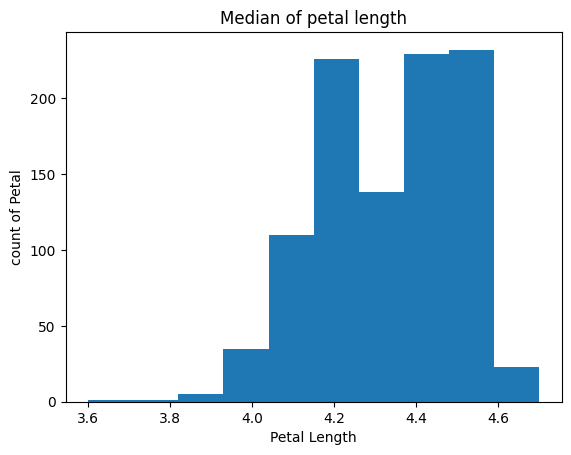

In [49]:

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(boot_se_samples)
x = plt.xlabel(df['Petal.Length'])
y = plt.ylabel(len(df['Petal.Length']))

# Add a title
plt.title ('Median of petal length')

# Add a label to the x-axis
plt.xlabel('Petal Length')

# Add a label to the y-axis
plt.ylabel('count of Petal')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 
-   this shipmet would require space, and tall cargo trasport to be able to deliver petals. 